In [1]:
#!pip install git+https://github.com/twave-io/twave-api-client.git@0.1.1

from os import environ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twave_client import TWaveClient

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

## Accessing the TWave API

In [2]:
#host = 'api.adif.twave.io'
host = 'localhost:8080'
token = environ['API_TOKEN']

api = TWaveClient(host, token)

## Listing assets

In [3]:
assets = api.list_assets()
print(assets)

[Asset(id='Cl8xACci15o', version=0, created_at='2022-10-27T17:05:47Z', updated_at='2022-10-27T17:05:47Z', name='Marota', description='T8 8080880')]


In [4]:
asset = api.get_asset(assets[0].id)
print(asset.name)

Marota


## Listing metrics

In [5]:
metrics = api.list_metrics(asset=asset.id)
pd.DataFrame(metrics)

,id,asset_id,name,data_type,enum_type,unit,limit_min,limit_max,has_alarm,agg_method,format,suffix
0,ITyjaRqr4GI,Cl8xACci15o,strategy,int,,,0,0,False,mean,,
1,1ly8GlIIrpc,Cl8xACci15o,GEO1.bias,float,,V,-24,24,False,mean,,
2,6r2wjDgV4q,Cl8xACci15o,state,enum,state.Cl8xACci15o,,0,0,False,mean,,
3,CgSNR6y67ZW,Cl8xACci15o,PT100_2.bias,float,,V,0,0,False,mean,,
4,EEGFhsFHN12,Cl8xACci15o,PPS.freq,float,,,0,100,False,mean,,
5,EcIGK5CuELO,Cl8xACci15o,PT100_2.val,float,,,0,100,False,mean,,
6,HOt1OT60eGf,Cl8xACci15o,PPS.bias,float,,V,0,0,False,mean,,
7,4cYLzrcBhBI,Cl8xACci15o,load,float,,G,0,0,False,mean,,
8,9I3oOzs0Rtw,Cl8xACci15o,PT100_1.bias,float,,V,0,0,False,mean,,
9,BLIJQPl0gEq,Cl8xACci15o,GEO2.Peak,float,,,0,28,False,mean,,pk


## Plotting a trend

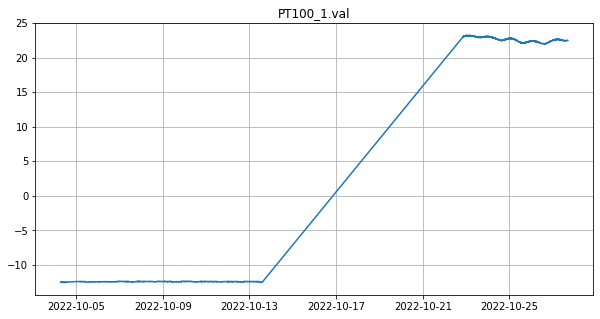

In [6]:
# obtain the first metric with a given name
metric = api.list_metrics(name='PT100_1.val')[0]

trend = api.get_trend(metric.id, window='10m')
t, y = trend.get_data()
t = np.array(t, dtype='datetime64[s]')
plt.plot(t, y)
plt.title(trend.meta.name)
plt.grid(True)

## Plotting a waveform

In [7]:
# list wave types
waves = api.list_waves(asset=asset.id)
pd.DataFrame(waves)

,id,asset_id,created_at,name,unit,data_format
0,CFG8YHv8NvT,Cl8xACci15o,2022-10-27T17:05:47Z,GEO2.40KHZ.wave,,float32
1,I3sKyptl8Mx,Cl8xACci15o,2022-10-27T17:05:47Z,GEO1.40KHZ.wave,,float32


In [8]:
# obtain a list of snapshots from the first wave
wave = waves[0]

t = api.list_wave_data(wave.id)
np.array(t, dtype='datetime64[s]')

array(['2022-10-06T21:00:00', '2022-10-06T23:45:00',
       '2022-10-07T00:45:00', ..., '2022-10-27T15:00:00',
       '2022-10-27T15:15:00', '2022-10-27T16:00:00'],
      dtype='datetime64[s]')

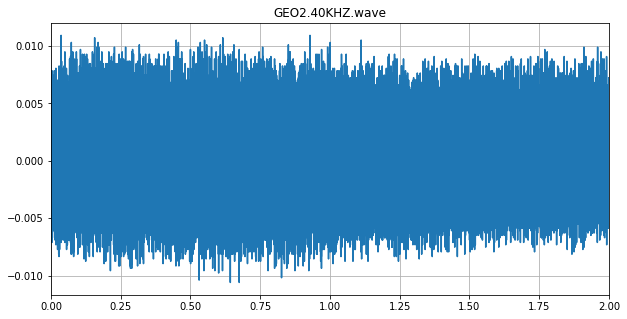

In [9]:
# plot the last available snapshot of the given wave
wf = api.get_wave(wave.id, 'last')
plt.plot(*wf.get_data())
plt.title(wf.meta.name)
plt.xlim([0, wf.get_duration()])
plt.grid(True)

## Plotting a spectrum

In [12]:
# list spectra types
spectra = api.list_spectra(asset=asset.id)
pd.DataFrame(spectra)

""


In [13]:
# obtain a list of snapshots from the first spectrum
spec = spectra[0]

t = api.list_spectrum_data(spec.id)
np.array(t, dtype='datetime64[s]')

IndexError: list index out of range

In [14]:
sp = api.get_spectrum(spec.id, 'last')
plt.plot(*sp.get_data())
plt.title(sp.meta.name)
plt.xlim(0)
plt.ylim(0)
plt.grid(True)

NameError: name 'spec' is not defined